### Loading the data

In [6]:
import pandas as pd

# Load the data from the CSV file
file_path = './Data - RWT.csv'
df = pd.read_csv(file_path)
# Display first few rows of the DataFrame
df.head()


,Year,January,Feb,March,April,May,June,July,August,Sep,Oct,November,Dec
0,2023,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,26,26.0,26.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
2,2021,26,26.0,26.0,27.0,27.0,27.0,27.0,26.0,27.0,26.0,26.0,26.0
3,2020,25,26.0,NaN,27.0,26.0,27.0,26.0,26.0,26.0,27.0,27.0,26.0
4,2019,23,26.0,27.0,27.0,27.0,27.0,28.0,26.0,27.0,27.0,26.0,25.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      9 non-null      int64  
 1   January   9 non-null      int64  
 2   Feb       7 non-null      float64
 3   March     6 non-null      float64
 4   April     7 non-null      float64
 5   May       7 non-null      float64
 6   June      8 non-null      float64
 7   July      8 non-null      float64
 8   August    8 non-null      float64
 9   Sep       8 non-null      float64
 10  Oct       8 non-null      float64
 11  November  8 non-null      float64
 12  Dec       8 non-null      float64
dtypes: float64(11), int64(2)
memory usage: 1.0 KB


### Data Preprocessing
We have used two methods to fill the missing values:

Mean-Filled Data: Missing values are filled using the mean of the respective columns.

Interpolated Data: Missing values are filled using linear interpolation.

 1. Filling missing values with the mean of the respective month's temperature across all years.

 2. Using linear interpolation to fill the missing values, taking advantage of the temporal nature of the data.

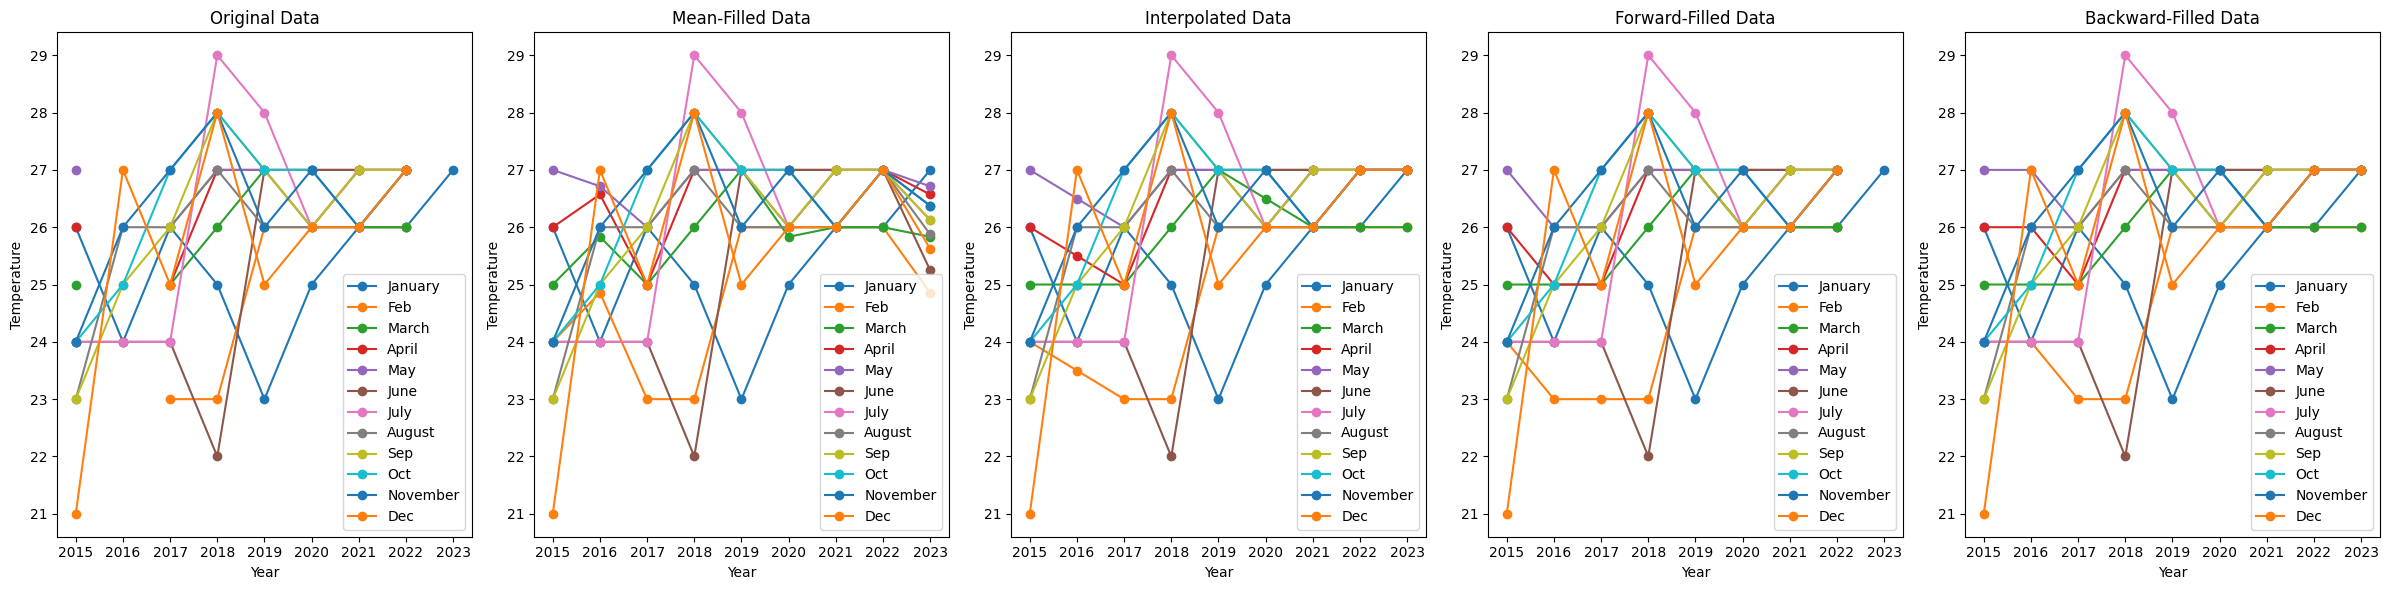

In [9]:
import matplotlib.pyplot as plt

# Method 1: Filling missing values with the mean
df_mean_filled = df.fillna(df.mean())

# Method 2: Filling missing values using linear interpolation
df_interpolated = df.interpolate(method='linear', limit_direction='both')

# Method 3: Forward fill (filling missing values with previous valid value)
df_forward_filled = df.fillna(method='ffill')

# Method 4: Backward fill (filling missing values with next valid value)
df_backward_filled = df.fillna(method='bfill')

# Plot original and filled data to visualize the effect of filling missing values
fig, axes = plt.subplots(1, 5, figsize=(24, 6))

# Plot original data
df.plot(ax=axes[0], x='Year', title='Original Data', marker='o')
axes[0].set_ylabel('Temperature')

# Plot mean-filled data
df_mean_filled.plot(ax=axes[1], x='Year', title='Mean-Filled Data', marker='o')
axes[1].set_ylabel('Temperature')

# Plot interpolated data
df_interpolated.plot(ax=axes[2], x='Year', title='Interpolated Data', marker='o')
axes[2].set_ylabel('Temperature')

# Plot forward-filled data
df_forward_filled.plot(ax=axes[3], x='Year', title='Forward-Filled Data', marker='o')
axes[3].set_ylabel('Temperature')

# Plot backward-filled data
df_backward_filled.plot(ax=axes[4], x='Year', title='Backward-Filled Data', marker='o')
axes[4].set_ylabel('Temperature')

plt.tight_layout()
plt.show()

In [10]:
# Return filled DataFrames
df_mean_filled.head(), df_interpolated.head(), df_forward_filled.head(), df_backward_filled.head()

(   Year  January        Feb      March      April        May   June    July  \
 0  2023       27  24.857143  25.833333  26.571429  26.714286  25.25  26.125   
 1  2022       26  26.000000  26.000000  27.000000  27.000000  27.00  27.000   
 2  2021       26  26.000000  26.000000  27.000000  27.000000  27.00  27.000   
 3  2020       25  26.000000  25.833333  27.000000  26.000000  27.00  26.000   
 4  2019       23  26.000000  27.000000  27.000000  27.000000  27.00  28.000   
 
    August     Sep     Oct  November     Dec  
 0  25.875  26.125  26.375    26.375  25.625  
 1  27.000  27.000  27.000    27.000  27.000  
 2  26.000  27.000  26.000    26.000  26.000  
 3  26.000  26.000  27.000    27.000  26.000  
 4  26.000  27.000  27.000    26.000  25.000  ,
    Year  January   Feb  March  April   May  June  July  August   Sep   Oct  \
 0  2023       27  26.0   26.0   27.0  27.0  27.0  27.0    27.0  27.0  27.0   
 1  2022       26  26.0   26.0   27.0  27.0  27.0  27.0    27.0  27.0  27.0  

In [15]:
# Save the preprocessed data - The interpolated data, which I consider the best method for your task given its temporal nature, will be used for the rest of the notebook
df_interpolated.to_csv('interpolated_data.csv', index=False)
df_interpolated = pd.read_csv('interpolated_data.csv')
df_interpolated.head()

,Year,January,Feb,March,April,May,June,July,August,Sep,Oct,November,Dec
0,2023,27,26.0,26.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
1,2022,26,26.0,26.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
2,2021,26,26.0,26.0,27.0,27.0,27.0,27.0,26.0,27.0,26.0,26.0,26.0
3,2020,25,26.0,26.5,27.0,26.0,27.0,26.0,26.0,26.0,27.0,27.0,26.0
4,2019,23,26.0,27.0,27.0,27.0,27.0,28.0,26.0,27.0,27.0,26.0,25.0


In [18]:
# before we process the data nan values compare to the original data
df.head()

,Year,January,Feb,March,April,May,June,July,August,Sep,Oct,November,Dec
0,2023,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,26,26.0,26.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
2,2021,26,26.0,26.0,27.0,27.0,27.0,27.0,26.0,27.0,26.0,26.0,26.0
3,2020,25,26.0,NaN,27.0,26.0,27.0,26.0,26.0,26.0,27.0,27.0,26.0
4,2019,23,26.0,27.0,27.0,27.0,27.0,28.0,26.0,27.0,27.0,26.0,25.0


Given the nature of the data, which appears to be a time series, linear interpolation might be a more suitable approach for filling missing values. This method takes into account the temporal structure of the data.

### ML method

In [28]:
y

array([26. , 23. , 21. , 24. , 26. , 24. , 24. , 25. , 27. , 24. , 24. ,
       23. , 25.5, 26. , 27. , 23.5, 24. , 24. , 24. , 25. , 26.5, 26. ,
       25. , 25. , 25. , 26. , 25. , 23. , 26. , 24. , 24. , 25. , 26. ,
       27. , 27. , 26. , 27. , 27. , 28. , 23. , 25. , 29. , 22. , 26. ,
       27. , 28. , 28. , 28. , 27. , 26. , 25. , 26. , 23. , 28. , 27. ,
       27. , 27. , 26. , 27. , 27. , 27. , 26. , 26. , 26. , 25. , 26. ,
       27. , 26.5, 26. , 27. , 27. , 26. , 27. , 26. , 26. , 26. , 26. ,
       27. , 27. , 26. , 27. , 26. , 26. , 27. , 27. , 27. , 27. , 26. ,
       26. , 27. , 27. , 26. , 27. , 27. , 27. , 27. , 27. , 27. , 27. ,
       26. , 27. , 27. , 27. , 26. , 27. , 27. , 27. , 27. ])

In [30]:
df_melted

,Year,Month,Temperature,Month_Year
0,2015,April,26.0,April-2015
1,2015,August,23.0,August-2015
2,2015,Dec,21.0,Dec-2015
3,2015,Feb,24.0,Feb-2015
4,2015,January,26.0,January-2015
...,...,...,...,...
103,2023,March,26.0,March-2023
104,2023,May,27.0,May-2023
105,2023,November,27.0,November-2023
106,2023,Oct,27.0,Oct-2023


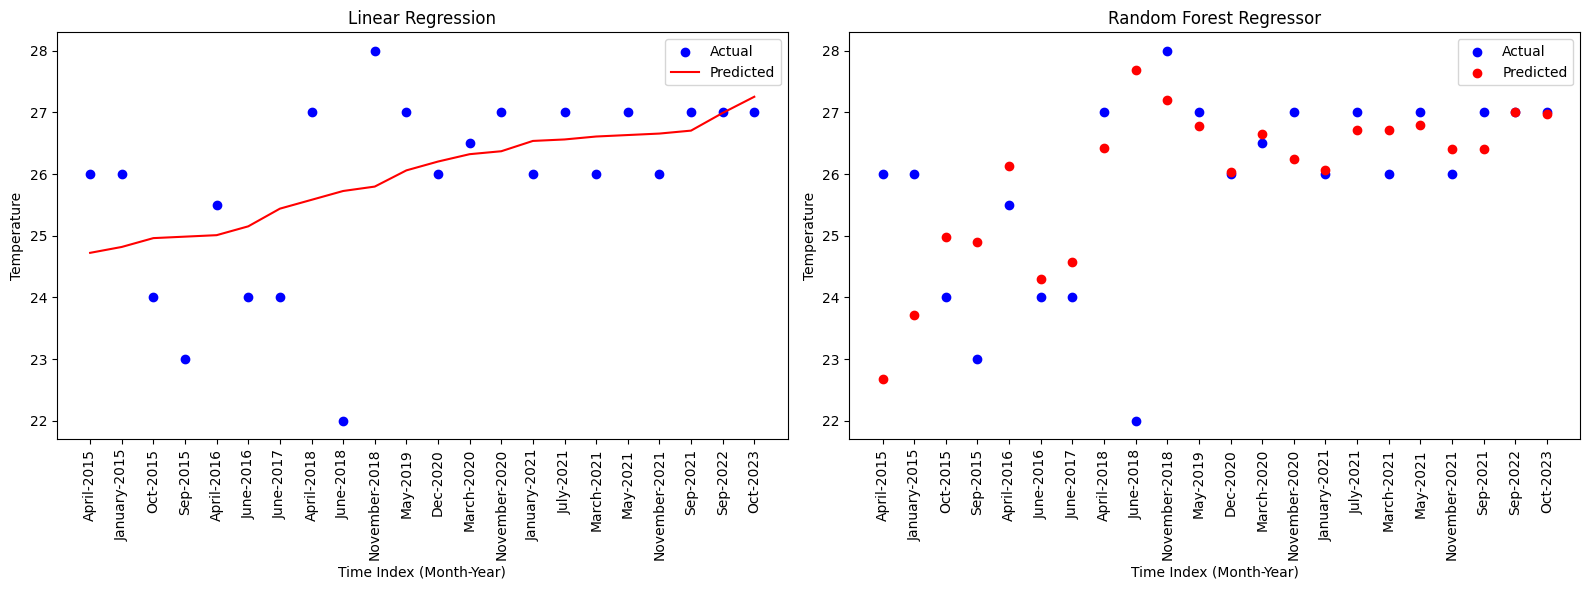

(1.2649604696932182,
 0.9522764188537679,
 1.6001249898864869,
 1.607019050065284,
 0.9324999999999997,
 2.5825102272727274)

In [27]:
# Adding month labels for the time index in the plot
import calendar

# Create a month-year label for each record in the melted DataFrame
df_melted['Month_Year'] = df_melted['Month'] + '-' + df_melted['Year'].astype(str)

# Split the data into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(df_melted.index.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Train the models again (same as above)
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluate the models
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Sort the test set by the original index to get month labels
sorted_indices = np.argsort(X_test, axis=0).flatten()
sorted_X_test = X_test[sorted_indices]
sorted_y_test = y_test[sorted_indices]

# Get month labels
month_labels = df_melted.loc[sorted_X_test.flatten(), 'Month_Year'].values

# Plot the results with month labels and make sure x-ticks are rotated for both plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression Plot
axes[0].scatter(month_labels, sorted_y_test, color='blue', label='Actual')
axes[0].plot(month_labels, y_pred_lr[sorted_indices], color='red', label='Predicted')
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Time Index (Month-Year)')
axes[0].set_ylabel('Temperature')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-ticks for Linear Regression

# Random Forest Plot
axes[1].scatter(month_labels, sorted_y_test, color='blue', label='Actual')
axes[1].scatter(month_labels, y_pred_rf[sorted_indices], color='red', label='Predicted')
axes[1].set_title('Random Forest Regressor')
axes[1].set_xlabel('Time Index (Month-Year)')
axes[1].set_ylabel('Temperature')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-ticks for Random Forest

plt.tight_layout()
plt.show()

rmse_lr, mae_lr, mse_lr, rmse_rf, mae_rf, mse_rf


### Linear Regression

Root Mean Squared Error (RMSE): 1.26

Mean Absolute Error (MAE): 0.95

Mean Square Error (MSE): 1.6

### Random Forest Regressor

Root Mean Squared Error (RMSE): 1.6

Mean Absolute Error (MAE): 0.93

Mean Square Error (MSE): 2.58

Linear Regression performs better in terms of RMSE and MSE.

Random Forest Regressor performs slightly better in terms of MAE.


### Hyperparameter tuning

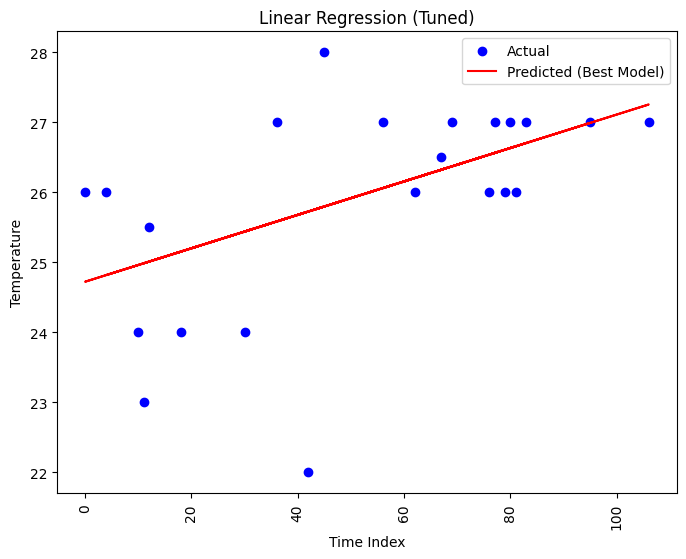

In [42]:
from sklearn.model_selection import GridSearchCV
import joblib
# Hyperparameter grid for Linear Regression
linear_params = {'fit_intercept': [True, False], 'copy_X': [True, False]}

# Initialize GridSearchCV for Linear Regression
grid_search_linear = GridSearchCV(LinearRegression(), linear_params, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search_linear.fit(X_train, y_train)

# Get the best model and its parameters
best_linear_model = grid_search_linear.best_estimator_
best_linear_params = grid_search_linear.best_params_

# Save the best Linear Regression model
joblib.dump(best_linear_model, 'best_linear_model.pkl')

# Make predictions using the best Linear Regression model
y_pred_best_lr = best_linear_model.predict(X_test)

# Plot for best Linear Regression model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_best_lr, color='red', label='Predicted (Best Model)')
plt.title('Linear Regression (Tuned)')
plt.xlabel('Time Index')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions using the best Linear Regression model
y_pred_best_lr = best_linear_model.predict(X_test)

# Evaluate the best model
rmse_best_lr = np.sqrt(mean_squared_error(y_test, y_pred_best_lr))
mae_best_lr = mean_absolute_error(y_test, y_pred_best_lr)
mse_best_lr = mean_squared_error(y_test, y_pred_best_lr)

# Print the metrics
print(f"Best Linear Regression Model Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_best_lr}")
print(f"Mean Absolute Error (MAE): {mae_best_lr}")
print(f"Mean Square Error (MSE): {mse_best_lr}")


Best Linear Regression Model Metrics:
Root Mean Squared Error (RMSE): 1.2649604696932182
Mean Absolute Error (MAE): 0.9522764188537679
Mean Square Error (MSE): 1.6001249898864869


In [40]:
best_linear_params

{'copy_X': True, 'fit_intercept': True}

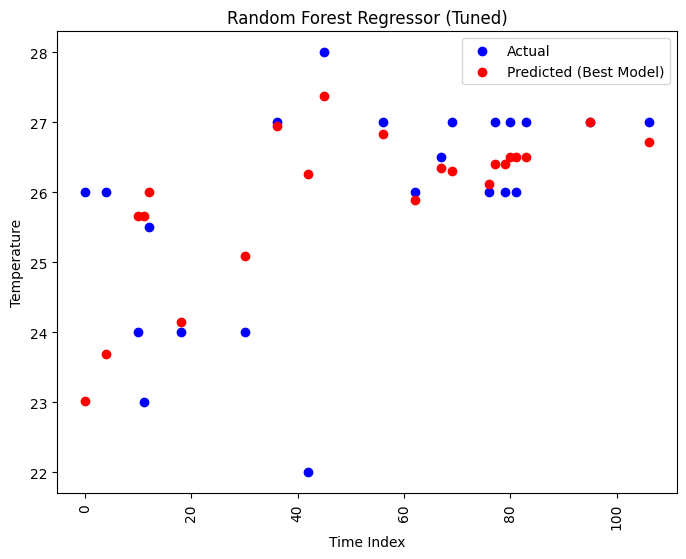

In [43]:
import joblib
# Hyperparameter grid for Random Forest
random_forest_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(), random_forest_params, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Save the best Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')
# Make predictions using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)

# Plot for best Random Forest model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_best_rf, color='red', label='Predicted (Best Model)')
plt.title('Random Forest Regressor (Tuned)')
plt.xlabel('Time Index')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [44]:
best_rf_params

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [46]:
# Importing necessary libraries for metrics calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

# Prepare metrics for the best Random Forest model
rf_metrics = {
    "Root Mean Squared Error (RMSE)": rmse_best_rf,
    "Mean Absolute Error (MAE)": mae_best_rf,
    "Mean Square Error (MSE)": mse_best_rf
}

rf_metrics

{'Root Mean Squared Error (RMSE)': 1.4448897266153196,
 'Mean Absolute Error (MAE)': 0.9230537518037518,
 'Mean Square Error (MSE)': 2.087706322078493}

Root Mean Squared Error (RMSE): 

Lower in Linear Regression (1.26) compared to Random Forest (1.44). 

RMSE gives more weight to larger errors, so a lower value generally indicates a better fit when larger errors are more costly.

Mean Absolute Error (MAE): Slightly lower in Random Forest (0.92) than in Linear Regression (0.95). 

MAE treats all errors equally, so a lower MAE suggests that the model has fewer errors overall.

Mean Square Error (MSE): 

Lower in Linear Regression (1.6) than in Random Forest (2.08). Like RMSE, MSE also gives more weight to larger errors, but without taking the square root.

Here's how you can interpret these metrics:

If giving more weight to larger errors (outliers) is important for your application, then the Linear Regression model seems to be better based on RMSE and MSE.

If you care about reducing the error equally across all predictions, then Random Forest might be slightly better based on MAE.

# inference

In [51]:
import joblib

# Load the saved models
best_linear_model = joblib.load('best_linear_model.pkl')
best_rf_model = joblib.load('best_rf_model.pkl')

# Year, Month, Temperature
# Dummy input (Time Index here, can be replaced with real time index)
dummy_input = np.array([[50], [100], [150]])

# Making predictions with Linear Regression model
y_pred_best_lr = best_linear_model.predict(dummy_input)

# Making predictions with Random Forest model
y_pred_best_rf = best_rf_model.predict(dummy_input)

y_pred_best_lr, y_pred_best_rf


(array([25.91747429, 27.11175321, 28.30603213]),
 array([25.28333333, 26.76666667, 26.71714286]))

For the Linear Regression model:

At time 50, the predicted temperature is approximately 25.92

At time 100, the predicted temperature is approximately 27.11

At time 150, the predicted temperature is approximately 28.31

For the Random Forest model:

At time 50, the predicted temperature is approximately 25.28

At time 100, the predicted temperature is approximately 26.77

At time 150, the predicted temperature is approximately 26.72

In [50]:
df_melted

,Year,Month,Temperature,Month_Year
0,2015,April,26.0,April-2015
1,2015,August,23.0,August-2015
2,2015,Dec,21.0,Dec-2015
3,2015,Feb,24.0,Feb-2015
4,2015,January,26.0,January-2015
...,...,...,...,...
103,2023,March,26.0,March-2023
104,2023,May,27.0,May-2023
105,2023,November,27.0,November-2023
106,2023,Oct,27.0,Oct-2023


In [49]:
print(df_melted.loc[50, 'Year'], df_melted.loc[50, 'Month'])
print(df_melted.loc[100, 'Year'], df_melted.loc[100, 'Month'])


2019 Dec
2023 January
